<html>
    <h2 align='center'>DoggieTweets</h2>
    <p>The dataset presented here is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs via Udacity</p>
    <a href="http://udacity.com">Visit Udacity</a>
    <a href="https://twitter.com/dog_rates">Visit WeRateDogs twitter page</a>
</html>

In [1]:
#!pip install tweepy

You should consider upgrading via the 'C:\Users\Mavuba\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import requests as r
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

GATHER:



Importing the first dataset

In [6]:
dogs = pd.read_csv('./twitter-archive-enhanced.csv')

In [7]:
len(dogs)

2356

In [8]:
dogs.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


Importing second dataset with requests library

The cells with marks # are requiered only for the first run of the script, later We will be using data stored in text files.

In [7]:
#img_pred = r.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [6]:
#with open('image-predictions.tsv', 'wb') as fd:
#    for chunk in img_pred:
#        fd.write(chunk)

In [9]:
dogs2 = pd.read_csv('image-predictions.tsv',sep='\t')

In [10]:
len(dogs2)

2075

In [11]:
dogs2.tail(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


Importing third dataset with Twitter API

The cells with marks # are requiered only for the first run of the script, later We will be using data stored in text files.

In [11]:
#consumer_key = 'key'
#consumer_secret = 'secret'
#access_token = 'token'
#access_secret = 'secret2'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth=auth, wait_on_rate_limit=True)

In [13]:
#dog3 = []
#for tweet_id in dogs2['tweet_id']:
#    try:
#        tweet = api.get_status(tweet_id, tweet_mode='extended')
#        tweet_id = tweet.id
#        retweet_count = tweet.retweet_count
#        favorite_count = tweet.favorite_count
#        dog3.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count})
#    except:
#        continue
        

Rate limit reached. Sleeping for: 215
Rate limit reached. Sleeping for: 557


In [17]:
#with open ('tweet_json.json', 'w') as file:
#    jsons = json.dumps(dog3)
#    file.write(jsons)
    

In [12]:
dogs3 = pd.read_json('./tweet_json.json')

In [13]:
dogs3.tail(2)

,tweet_id,retweet_count,favorite_count
2055,892177421306343426,5291,29295
2056,892420643555336193,6989,33772


ASSESS:




Preparing data:

Some would start with cleaning the data but my strategy is to work only with tweets,

witch occurs in all three datasets. I will start with merging datasets and then i will move on to cleaning.






In [14]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [23]:
dogs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
dogs3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2057 non-null   int64
 1   retweet_count   2057 non-null   int64
 2   favorite_count  2057 non-null   int64
dtypes: int64(3)
memory usage: 48.3 KB


QUALITY iSSUE #1
Data sets have different lengths, while merging them only on tweets that occur in all 3 datasets, We will discard ones which don't.

In [15]:
doggies2 = dogs2.merge(dogs3,on='tweet_id',how='inner')

In [16]:
doggies = dogs.merge(doggies2,on='tweet_id',how='inner')

In [17]:
doggies.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2054,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,36,100
2055,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,39,112
2056,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,422,2289


In [18]:
doggies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  doggo                       2057 

CLEAN:


QUALITY iSSUE #2

We will remove tweets in_reply to other users from our datasets.

In [19]:
labels =doggies['in_reply_to_user_id'].dropna().index.to_list()

In [20]:
labels2 =doggies['retweeted_status_id'].dropna().index.to_list()

In [21]:
doggies.drop(axis=0,labels=labels,inplace=True)

In [22]:
doggies.drop(axis=0,labels=labels2,inplace=True)

In [23]:
doggies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2056
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1963 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1963 non-null   object 
 4   source                      1963 non-null   object 
 5   text                        1963 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1963 non-null   object 
 10  rating_numerator            1963 non-null   int64  
 11  rating_denominator          1963 non-null   int64  
 12  name                        1963 non-null   object 
 13  doggo                       1963 

QUALITY iSSUE #3


Since We don't have any values in columns in_reply_to_status_id and in_reply_to_status_id,

let's just remove them. I will also remove columns: retweeted_status_id, retweeted_status_user_id,

retweeted_status_timestamp.



In [24]:
columns = ['in_reply_to_user_id','in_reply_to_status_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp']

In [25]:
doggies.drop(axis=1,columns=columns,inplace=True)

In [26]:
doggies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2056
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1963 non-null   int64  
 1   timestamp           1963 non-null   object 
 2   source              1963 non-null   object 
 3   text                1963 non-null   object 
 4   expanded_urls       1963 non-null   object 
 5   rating_numerator    1963 non-null   int64  
 6   rating_denominator  1963 non-null   int64  
 7   name                1963 non-null   object 
 8   doggo               1963 non-null   object 
 9   floofer             1963 non-null   object 
 10  pupper              1963 non-null   object 
 11  puppo               1963 non-null   object 
 12  jpg_url             1963 non-null   object 
 13  img_num             1963 non-null   int64  
 14  p1                  1963 non-null   object 
 15  p1_conf             1963 non-null   float64
 16  p1_dog

In [28]:
doggies.tail(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2055,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,39,112
2056,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,422,2289


TIDINESS ISSUE #1


Let's make sure there are no duplicates

In [29]:
len(doggies) == len(doggies.drop_duplicates())

True

TIDINESS ISSUE #2


Ok, so I've spotted that in p3 columns some genders starts with capital letter and some with lower.

That could be also true for p1 or p2 columns. So let's make sure we are consistent here and we gonna go

with lower letters.

In [30]:
doggies['p1'] = doggies['p1'].str.lower()
doggies['p2'] = doggies['p2'].str.lower()
doggies['p3'] = doggies['p3'].str.lower()

In [32]:
doggies.tail(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2055,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,...,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,39,112
2056,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,...,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,422,2289


Ok. I'm very happy with the quality of data so far, so I will save it and move on from here.

In [33]:
doggies.to_csv('./doggies.csv')

Now We will try to get best possible prediction what breed these doggies are and

clean our dataset further.

In [2]:
doggies = pd.read_csv('./doggies.csv')

In [3]:
doggies.drop(columns='Unnamed: 0',inplace=True)

In [32]:
doggies.tail(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2033,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,...,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,422,2289


QUALITY iSSUE #4


Some data in columns p1,p2,p3 are actually not dogs. What We will do is add a new column which will have most probable breed which is actually a dog and another one with probability of that being actually True.

In [35]:
masterdog = doggies

In [36]:
masterdog['breed'] = np.nan

In [37]:
masterdog['breed conf.'] = np.nan

In [38]:
indexer = []
for _ in masterdog['tweet_id']:
    indexer.append(_)
    
    

In [39]:
masterdog.set_index('tweet_id',inplace=True)

In [40]:
for _ in indexer:
    p1 = masterdog.loc[_,'p1']
    p2 = masterdog.loc[_,'p2']
    p3 = masterdog.loc[_,'p3']
    
    p1 = p1.lower()
    p2 = p2.lower()
    p3 = p3.lower()
    
    p1_conf = masterdog.loc[_,'p1_conf']
    p2_conf = masterdog.loc[_,'p2_conf']
    p3_conf = masterdog.loc[_,'p3_conf']
    
    p1_dog = masterdog.loc[_,'p1_dog']
    p2_dog = masterdog.loc[_,'p2_dog']
    p3_dog = masterdog.loc[_,'p3_dog']
    
    if p1_dog == True:
        masterdog.loc[_,'breed'] = p1
        masterdog.loc[_,'breed conf.'] = p1_conf
    elif p2_dog == True and p1_dog != True:
        masterdog.loc[_,'breed'] = p2
        masterdog.loc[_,'breed conf.'] = p2_conf
    elif p3_dog == True and p1_dog != True and p2_dog != True:
        masterdog.loc[_,'breed'] = p3
        masterdog.loc[_,'breed conf.'] = p3_conf
    else:
        continue

In [41]:
masterdog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 892420643555336193 to 666020888022790149
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           1963 non-null   object 
 1   source              1963 non-null   object 
 2   text                1963 non-null   object 
 3   expanded_urls       1963 non-null   object 
 4   rating_numerator    1963 non-null   int64  
 5   rating_denominator  1963 non-null   int64  
 6   name                1963 non-null   object 
 7   doggo               1963 non-null   object 
 8   floofer             1963 non-null   object 
 9   pupper              1963 non-null   object 
 10  puppo               1963 non-null   object 
 11  jpg_url             1963 non-null   object 
 12  img_num             1963 non-null   int64  
 13  p1                  1963 non-null   object 
 14  p1_conf             1963 non-null   float64
 15  p1_dog              1963

QUALITY iSSUE #5

We got some rating denominators not equal to 10, so probably mistake. Let's just go with correct ones.

In [42]:
masterdog['rating_denominator'].value_counts()

10     1946
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [43]:
masterdog = masterdog.where(masterdog['rating_denominator']==10).dropna()

In [44]:
masterdog['rating_denominator'].value_counts()

10.0    1642
Name: rating_denominator, dtype: int64

QUALITY iSSUE #6

We don't need columns p1,p2,p3,p1_conf...and so becouse we already extracted informations out of them.
So we will delete them

In [45]:
masterdog.drop(axis=1,columns=['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog',
                              'p3','p3_conf','p3_dog'],inplace=True)

In [46]:
masterdog.head(2)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,retweet_count,favorite_count,breed,breed conf.
tweet_id,,,,,,,,,,,,,,,,,
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,5291.0,29295.0,chihuahua,0.323581
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,3470.0,22030.0,chihuahua,0.716012


In [47]:
masterdog['name'].value_counts()

None          388
a              45
Cooper         10
Tucker          9
Lucy            9
             ... 
Philbert        1
Rupert          1
Brudge          1
Shadoe          1
Christoper      1
Name: name, Length: 847, dtype: int64

QUALITY iSSUE #7

Some names in dataset are missing. We don't want to drop records just becouse names were extracted wrongly, but from We can see in description some of tweets are still not dogs. We will delete them.

In [51]:
masterdog.where(masterdog['name'] == 'a').dropna()

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,retweet_count,favorite_count,breed,breed conf.
tweet_id,,,,,,,,,,,,,,,,,
881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,10.0,a,None,None,pupper,None,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1.0,13373.0,43367.0,samoyed,0.281463
772581559778025472,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10.0,10.0,a,None,None,None,None,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,3.0,1584.0,6106.0,newfoundland,0.574345
747885874273214464,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,8.0,10.0,a,None,None,None,None,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,1.0,881.0,2724.0,kuvasz,0.408450
747816857231626240,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4.0,10.0,a,None,None,None,None,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,1.0,1056.0,4498.0,pembroke,0.768923
746872823977771008,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,https://twitter.com/dog_rates/status/746872823...,11.0,10.0,a,None,None,None,None,https://pbs.twimg.com/media/Cl1s1p7WMAA44Vk.jpg,1.0,1940.0,5567.0,pembroke,0.540201
743222593470234624,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,https://twitter.com/dog_rates/status/743222593...,12.0,10.0,a,None,None,pupper,None,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1.0,1737.0,5731.0,kuvasz,0.350629
717537687239008257,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,https://twitter.com/dog_rates/status/717537687...,11.0,10.0,a,None,None,None,None,https://pbs.twimg.com/media/CfU0t75W4AAUo9V.jpg,1.0,1663.0,5320.0,golden_retriever,0.779356
715733265223708672,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,https://twitter.com/dog_rates/status/715733265...,10.0,10.0,a,None,None,None,None,https://pbs.twimg.com/media/Ce7LlUeUUAEQkQl.jpg,1.0,1531.0,4290.0,dandie_dinmont,0.740229
704859558691414016,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,https://twitter.com/dog_rates/status/704859558...,10.0,10.0,a,None,None,pupper,None,https://pbs.twimg.com/media/CcgqBNVW8AE76lv.jpg,1.0,477.0,2073.0,pug,0.284428


In [54]:
masterdog.reset_index(inplace=True)
labels3 = []
for _ in masterdog['tweet_id']:
    labels3.append(_)


In [56]:
masterdog.set_index('tweet_id',inplace=True)
toTrash = []
for _ in labels3:
    tabu = 'we only rate dogs'
    text =  masterdog.loc[_,'text']
    text = text.lower()
    if tabu in text:
        toTrash.append(_)
    else:
        continue
        
        

In [59]:
masterdog.drop(axis=0,index=toTrash,inplace=True)

In [60]:
masterdog['name'].value_counts()

None          359
a              39
Cooper         10
Tucker          9
Oliver          9
             ... 
Philbert        1
Rupert          1
Brudge          1
Shadoe          1
Christoper      1
Name: name, Length: 841, dtype: int64

QUALITY iSSUE #8

We will delete columns doggo, floofer, pupper, puppo. Becouse I'm not interested in them in my analyses.

In [61]:
toTrash2 = ['doggo', 'floofer', 'pupper', 'puppo']
masterdog.drop(axis=1,columns=toTrash2,inplace=True)

In [62]:
masterdog.tail(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,retweet_count,favorite_count,breed,breed conf.
tweet_id,,,,,,,,,,,,,
666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,36.0,100.0,german_shepherd,0.596461
666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,39.0,112.0,redbone,0.506826
666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,422.0,2289.0,welsh_springer_spaniel,0.465074


STORE AND ANALYSE:

In [63]:
masterdog.to_csv('./masterdog.csv')

Now, since We got our master data. We can start analyzing.

Let's check :
1. What is the most popular breed among the data?
2. Which dog has the highest rate among dataset?
3. Which dog has the highest amount of likes (twitter favorites) among the dataset?



Let's start with first one!


In [64]:
masterdog['breed'].value_counts()

golden_retriever      151
labrador_retriever     95
pembroke               91
chihuahua              88
pug                    59
                     ... 
entlebucher             1
japanese_spaniel        1
standard_schnauzer      1
silky_terrier           1
irish_wolfhound         1
Name: breed, Length: 113, dtype: int64

In [65]:
data = masterdog['breed'].value_counts()

In [66]:
breeds = pd.DataFrame(data)
breeds.reset_index(inplace=True)
indexer2 = []
for _ in breeds['index']:
    indexer2.append(_)
breeds.set_index('index',inplace=True)

In [67]:
other = 0
for _ in indexer2:
    race = breeds.loc[_,'breed']
    if race < 20:
        other += 1
        breeds = breeds.drop(axis=0,labels=_).dropna()
    else:
        continue

In [68]:
breeds.reset_index(inplace=True)

In [70]:
newline = {'index':'other','breed':other}

In [71]:
plotbreeds = breeds.append(newline,ignore_index=True)

C:\Users\Mavuba\AppData\Local\Temp\ipykernel_7904\406011772.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plotbreeds = breeds.append(newline,ignore_index=True)


In [72]:
plotbreeds = plotbreeds.set_index('index')

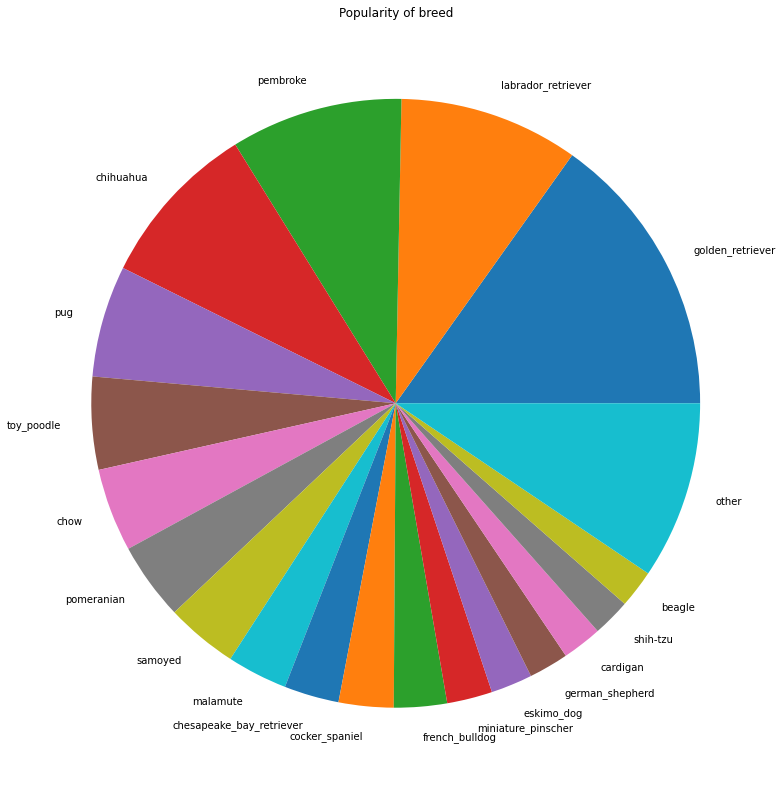

In [73]:
plotbreeds.plot(kind='pie',y=0,title='Popularity of breed',figsize=(14,14),ylabel="",legend=False);

So, the answer to the first question is a Golden Retriever with 151 appearances.
Top five breeds in dataset: Golden Retriever, Labrador Retriever, Pembroke, Chihuahua and Pug occured in almost 50% of all tweets on We Rank Dogs! Another 25% will be Toy Poodle, Chow, Pomeranian, Samoyed, Malamute, Chesapeake Bay Retriver and Cocker Spaniel.

What about the second one: Which dog has the highest rate among dataset?

In [74]:
masterdog.where(masterdog['rating_numerator'] == masterdog['rating_numerator'].max()).dropna()

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,retweet_count,favorite_count,breed,breed conf.
tweet_id,,,,,,,,,,,,,
786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1.0,5722.0,17354.0,pomeranian,0.467321


<html><body><img src="https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg">  </img>
    

And that is a winner. No questions asked ;)

Ok. Let's move to third question: Which dog has the highest amount of likes (twitter favorites) among the dataset?

In [75]:
masterdog.where(masterdog['favorite_count'] == masterdog['favorite_count'].max()).dropna()

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,retweet_count,favorite_count,breed,breed conf.
tweet_id,,,,,,,,,,,,,
744234799360020481,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,None,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,70570.0,144673.0,labrador_retriever,0.825333


In [126]:
masterdog.loc[744234799360020481,'jpg_url']

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

<html><body><img src="https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg">  </img></body></html>

This dog is definitely in summer mood. Are You?


As a bonus I've downloaded all immages in doggies dataset and created mosaic using program Foto-Mosaik-Edda
visit their page if You are intrested,
here -> https://https://fmedda.com/en/home

In [1]:
#count = 0
#for _ in doggies['jpg_url']:
#    img = r.get(_)
#    count +=1
#    with open ('img'+str(count)+'.jpg','wb') as f:
#        f.write(img.content)
#        f.close()

<html>
    <img src="https://imagizer.imageshack.com/img923/2254/m6Mr7m.jpg">